#Tutorial on LSTM
We try to build a LSTM that find the maximum in a sequence of numbers and returns its value and position

## Import useful stuff

In [ ]:
from keras.layers import Input,Dense,LSTM,BatchNormalization
from keras.models import Model
import numpy as np
from math import *
from matplotlib import pyplot as plt 


## Lets generate some data

We now generate ourself some images with a circle or a rectangle, of random color, in a random position.

Three different modes of generating the images are implemented:

*   A single shape per figure
*   Multiple shapes mixed in each figure
*   A single figure keeping track of the "bounding box"



### Additional Exercise
1. Try adding some random noise in the image background
2. Try adding more classes such e.g. Lines or Ellipses


In [ ]:


nsamples=20000
maxlen=5

data=np.zeros((nsamples,maxlen,2))
maxima=np.zeros(nsamples)
maximaIdx=np.zeros(nsamples)

for i in range(nsamples) :
  l=int(np.random.rand()*maxlen)+1
  seq=np.random.rand(l,2)
  pad=np.zeros((maxlen-l,2))
  row=np.concatenate((seq,pad))
  mod=[(x[0]**2+x[1]**2)**0.5 for x in row]
  maxima[i]=np.max(mod)
  maximaIdx[i]=np.argmax(mod)
  data[i,:]=row

targets=np.stack((maxima,maximaIdx),axis=-1)

print(data)

print(targets)

[[[0.01628079 0.49744278]
  [0.89640755 0.85205113]
  [0.83710484 0.83905751]
  [0.26536733 0.43817058]
  [0.72227534 0.10071202]]

 [[0.73515252 0.48735656]
  [0.59037031 0.24466195]
  [0.10204621 0.18168086]
  [0.25070817 0.21634683]
  [0.4360455  0.19555537]]

 [[0.42730126 0.3520332 ]
  [0.70890929 0.52649713]
  [0.63027741 0.45239076]
  [0.         0.        ]
  [0.         0.        ]]

 ...

 [[0.98324428 0.40376576]
  [0.         0.        ]
  [0.         0.        ]
  [0.         0.        ]
  [0.         0.        ]]

 [[0.99569842 0.78681615]
  [0.64146717 0.89769338]
  [0.         0.        ]
  [0.         0.        ]
  [0.         0.        ]]

 [[0.00625818 0.14177026]
  [0.97471348 0.94998554]
  [0.24938813 0.07619611]
  [0.36306611 0.33484299]
  [0.57434253 0.41506622]]]
[[1.23674477 1.        ]
 [0.8820236  0.        ]
 [0.88303545 1.        ]
 ...
 [1.06291867 0.        ]
 [1.26905279 0.        ]
 [1.36108004 1.        ]]


In [ ]:
inputs=Input(shape=(maxlen,2,))
norm=BatchNormalization()(inputs)
hidden=  LSTM(80)(norm)
#hidden=  LSTM(20, activation='relu')(inputs)
hidden=  Dense(30, activation='relu')(hidden)
hidden=  Dense(20, activation='relu')(hidden)
outputs=  Dense(2, activation='relu')(hidden)
model = Model(inputs=inputs, outputs=outputs)
model.compile(loss="MSE", optimizer='adam')

model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 5, 2)]            0         
                                                                 
 batch_normalization (BatchN  (None, 5, 2)             8         
 ormalization)                                                   
                                                                 
 lstm (LSTM)                 (None, 80)                26560     
                                                                 
 dense (Dense)               (None, 30)                2430      
                                                                 
 dense_1 (Dense)             (None, 20)                620       
                                                                 
 dense_2 (Dense)             (None, 2)                 42        
                                                             

And now let's fit it to our data.
The sample is automatically split in two so that 50% of it is used for validation and the other half for training


In [ ]:
print(targets)
history=model.fit(data,targets,validation_split=0.5,epochs=100)

[[1.23674477 1.        ]
 [0.8820236  0.        ]
 [0.88303545 1.        ]
 ...
 [1.06291867 0.        ]
 [1.26905279 0.        ]
 [1.36108004 1.        ]]
Epoch 1/100
313/313 [==============================] - 10s 11ms/step - loss: 0.3988 - val_loss: 0.2046
Epoch 2/100
313/313 [==============================] - 3s 9ms/step - loss: 0.1520 - val_loss: 0.1360
Epoch 3/100
313/313 [==============================] - 3s 10ms/step - loss: 0.1205 - val_loss: 0.1188
Epoch 4/100
313/313 [==============================] - 3s 10ms/step - loss: 0.1072 - val_loss: 0.1026
Epoch 5/100
313/313 [==============================] - 3s 10ms/step - loss: 0.0912 - val_loss: 0.0861
Epoch 6/100
313/313 [==============================] - 3s 8ms/step - loss: 0.0804 - val_loss: 0.1000
Epoch 7/100
313/313 [==============================] - 3s 9ms/step - loss: 0.0742 - val_loss: 0.0763
Epoch 8/100
313/313 [==============================] - 3s 10ms/step - loss: 0.0744 - val_loss: 0.0637
Epoch 9/100
313/313 [=========

*history* contains information about the training.  We can now now show the loss vs epoch for both validation and training samples.




dict_keys(['loss', 'val_loss'])


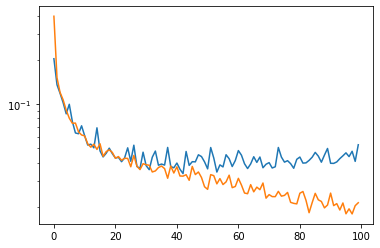

In [ ]:
print(history.history.keys())
plt.plot(history.history["val_loss"])
plt.plot(history.history["loss"])
plt.yscale('log')
plt.show()
#plt.plot(history.history["val_accuracy"])
#plt.plot(history.history["accuracy"])
#plt.show()


In [ ]:
print(model.predict(np.expand_dims(np.array([[0,0],[0,1],[1,1],[0,0],[0,0]]),axis=0) ))

#print(data[0:1])
#print(model.predict(data[0:1]))
#print(targets[0])

[[1.3676523 1.9856429]]


Let's try to mix an image with circles and rectangles and see how the network would evaluate it 

The following code can be used to visualize what features the first conv layer is looking at